In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data loading

# load dataset
df = pd.read_csv('owid-covid-data.csv')

# preview rows
print(" Rows of the dataset:\n", df.head())

# check columns
print(df.columns)

# identify missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


 Rows of the dataset:
   iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0   

In [9]:
# Filter countries of interest (e.g., Kenya, USA, India).
countries_of_interest = ['Kenya', 'United States', 'India']
print(df[df['location'].isin(countries_of_interest)])

# Drop rows with missing dates/critical values.
critical_columns = [
    'date',
    'location',
    'total_cases',
    'total_deaths',
    'new_cases',
    'new_deaths',
    'total_vaccinations'
                
]
df = df.dropna(subset=critical_columns) # Drop rows with any missing values in those columns

# Convert date column to datetime: pd.to_datetime().
df['date'] = pd.to_datetime(df['date'])

# Handle missing numeric values with fillna() or interpolate().
df.fillna(0, inplace=True) 
print(df.isnull().sum()) #condfirm missing values


       iso_code      continent       location        date  total_cases  \
173549      IND           Asia          India  2020-01-05          0.0   
173550      IND           Asia          India  2020-01-06          0.0   
173551      IND           Asia          India  2020-01-07          0.0   
173552      IND           Asia          India  2020-01-08          0.0   
173553      IND           Asia          India  2020-01-09          0.0   
...         ...            ...            ...         ...          ...   
405120      USA  North America  United States  2024-07-31  103436829.0   
405121      USA  North America  United States  2024-08-01  103436829.0   
405122      USA  North America  United States  2024-08-02  103436829.0   
405123      USA  North America  United States  2024-08-03  103436829.0   
405124      USA  North America  United States  2024-08-04  103436829.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
173549        0.0                 NaN       

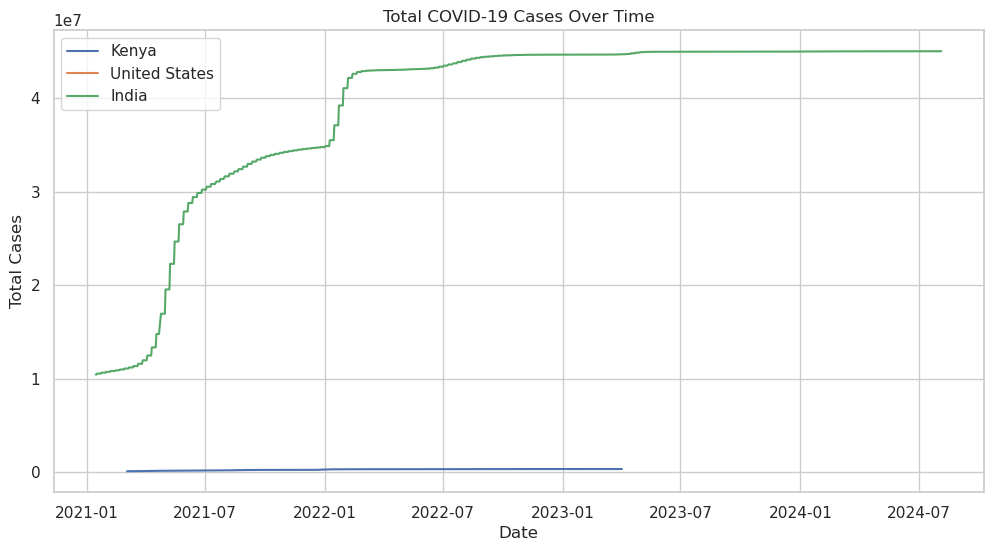

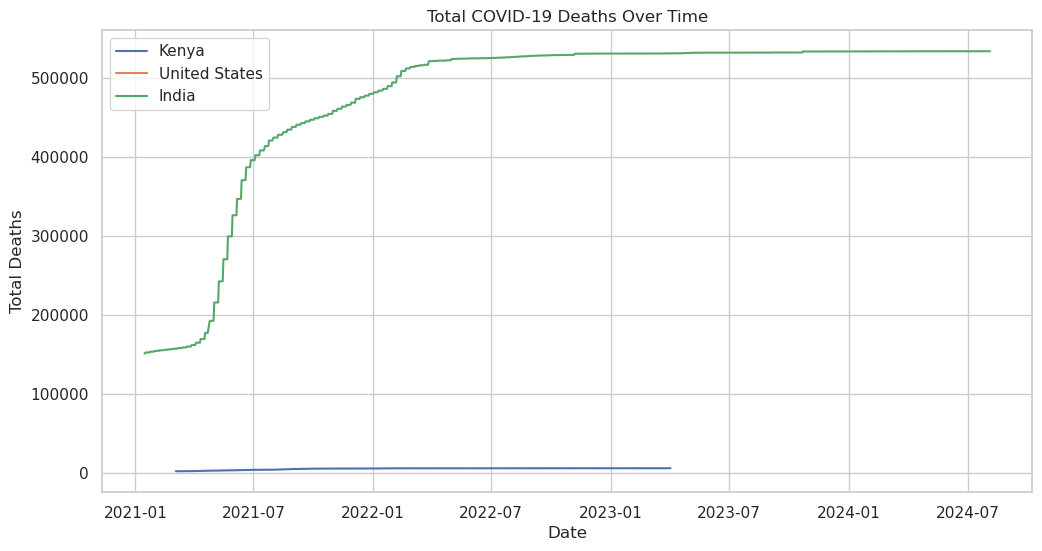

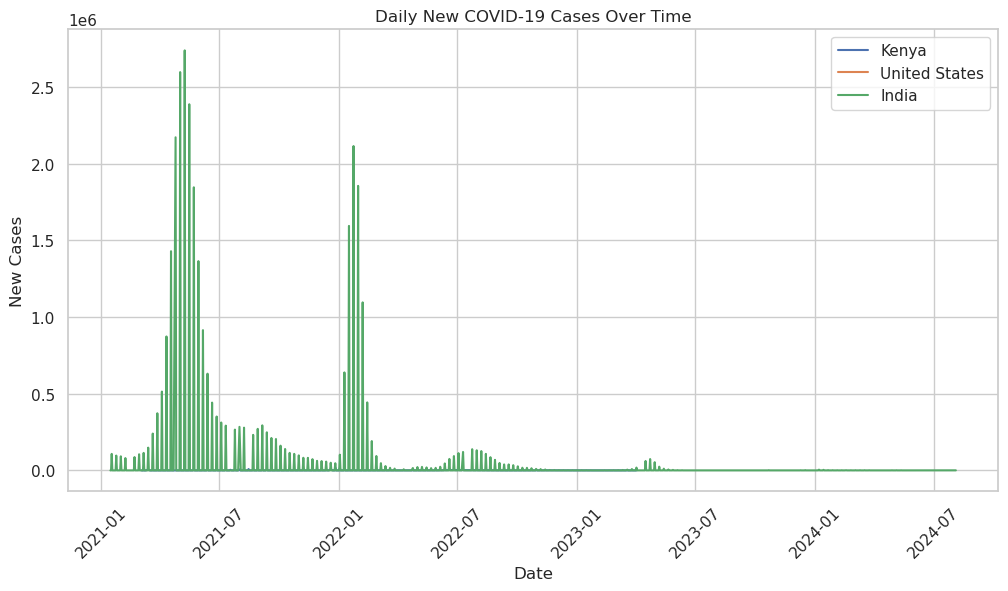

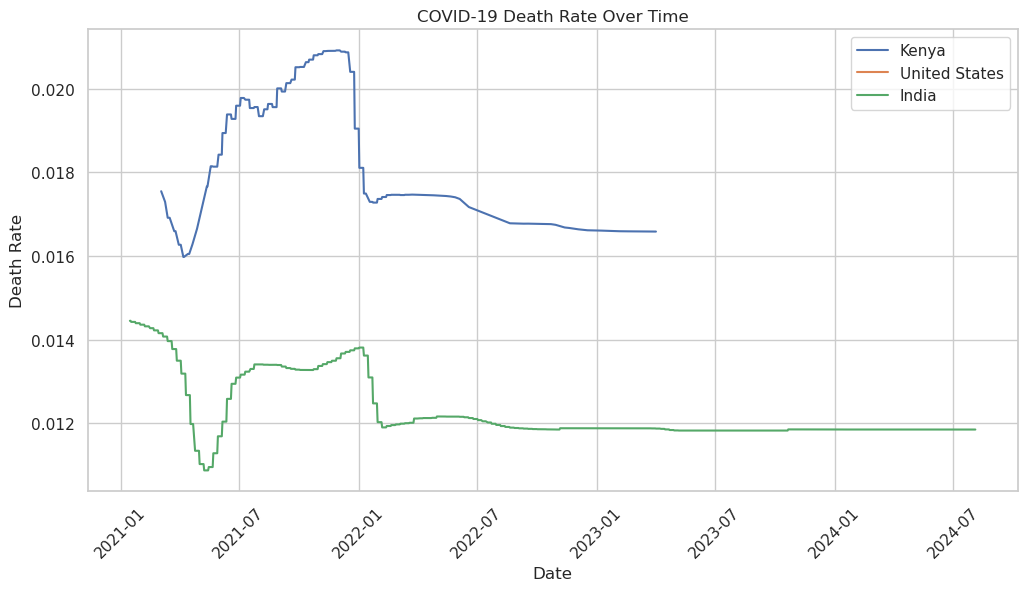

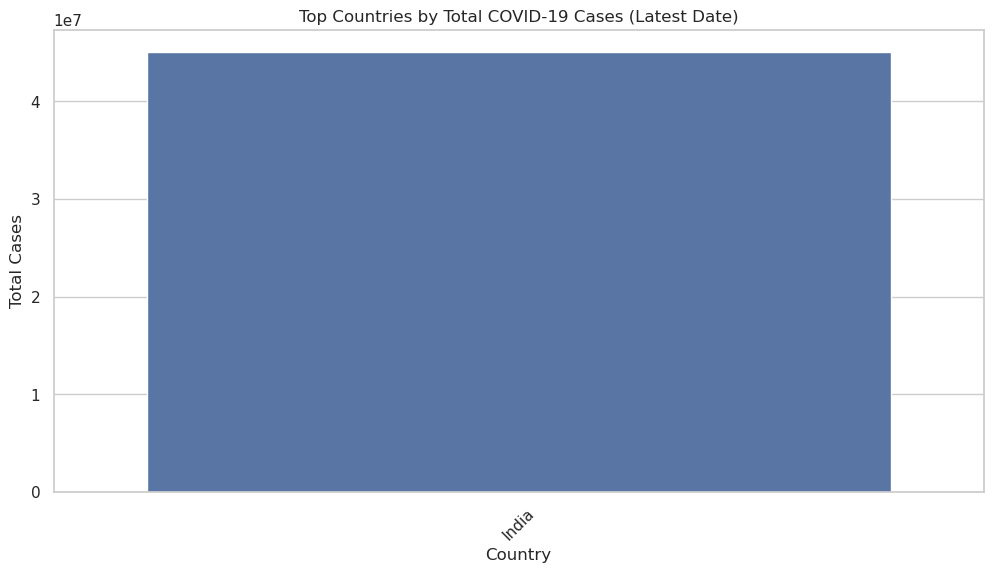

In [35]:
# Exploratory Data Analysis (EDA)

# Set up plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# List of countries (ensure you've filtered your DataFrame earlier)
countries = ['Kenya', 'United States', 'India']
df_eda = df[df['location'].isin(countries)]

# Total cases over time
for country in countries:
    country_data = df_eda[df_eda['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

# Total deaths over time
for country in countries:
    country_data = df_eda[df_eda['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

# Compare Daily New Cases Between Countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_eda[df_eda['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Calculate death rate for each row
df_eda['death_rate'] = df_eda['total_deaths'] / df_eda['total_cases']

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_eda[df_eda['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#BAR CHART
# Filter the dataset for the latest date
latest_data = df[df['date'] == df['date'].max()]

# Sort by total cases in descending order and select top countries (e.g., top 10)
top_countries = latest_data.sort_values(by='total_cases', ascending=False).head(10)  # Adjust the number as needed

# Create the bar chart for total cases at the latest date
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='location', y='total_cases')
plt.title('Top Countries by Total COVID-19 Cases (Latest Date)')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()





/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


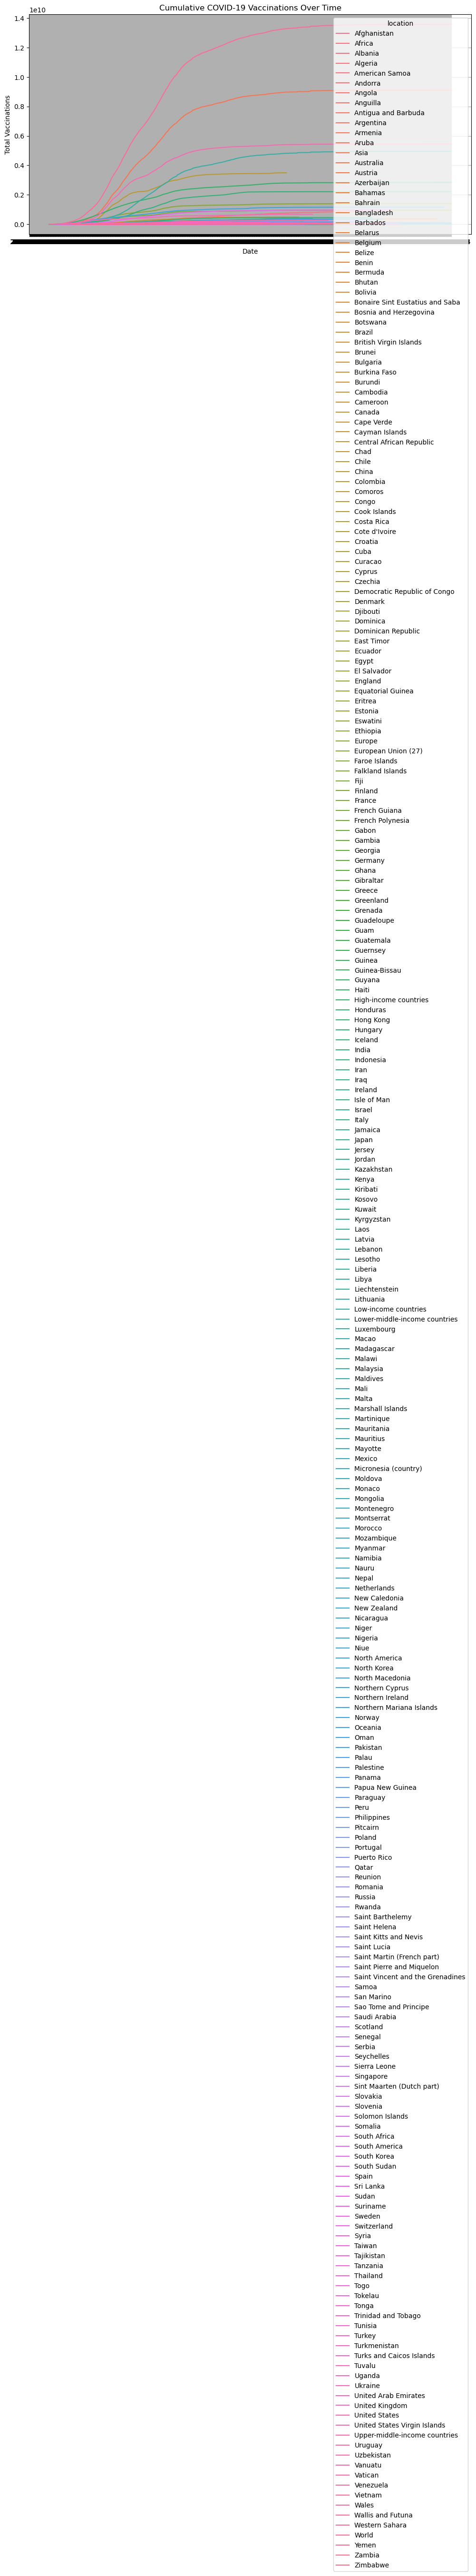

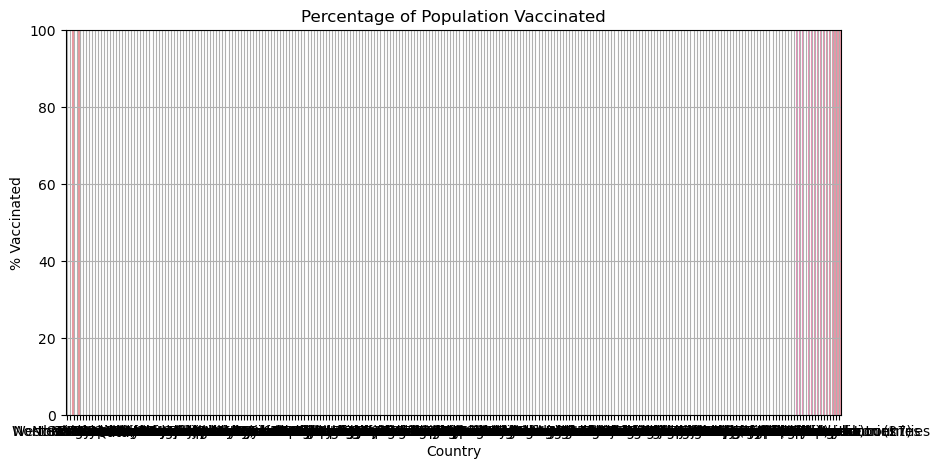

In [18]:
# Cumulative Vaccinations Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='total_vaccinations', hue='location')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.ylabel('Total Vaccinations')
plt.xlabel('Date')
plt.grid(True)
plt.show()


# % of Population Vaccinated (Latest Data)


# Get latest date per country
latest = df.sort_values('date').groupby('location').tail(1)

# Example assumes population column is available
latest['percent_vaccinated'] = latest['total_vaccinations'] / latest['population'] * 100

plt.figure(figsize=(10, 5))
sns.barplot(data=latest, x='location', y='percent_vaccinated')
plt.title('Percentage of Population Vaccinated')
plt.ylabel('% Vaccinated')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.grid(True)
plt.show()

